In [2]:
import pandas as pd
from datetime import datetime
import rqalpha as rqa
import rqalpha_plus
import rqdatac as rqd
import rqoptimizer as rqo

In [13]:
data0 = pd.read_csv('alphaAx_全部A股_基础池取交集_F22_LHZX.csv',header=None)
data = data0.copy()
data[0] = data[0].astype(str)
data.columns = ['date','code','factor']
data['code'] = data['code'].map(lambda x:x[:7]+'XSHE' if x[-2:]=='SZ' else x[:7]+'XSHG')
# data.set_index(['date','code'],inplace=True)

In [14]:
data

,date,code,factor
0,20170126,000001.XSHE,54.7920
1,20170126,000002.XSHE,77.0942
2,20170126,000005.XSHE,47.9838
3,20170126,000006.XSHE,56.7424
4,20170126,000008.XSHE,58.4712
...,...,...,...
69429,20200729,603988.XSHG,73.1145
69430,20200729,603989.XSHG,52.9845
69431,20200729,603990.XSHG,22.2933
69432,20200729,603992.XSHG,59.0909


In [16]:
data['industry'] = data['code'].map(rqd.zx_instrument_industry(data['code'].unique()).squeeze())

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False
plt.style.use('ggplot')

<AxesSubplot:xlabel='industry'>

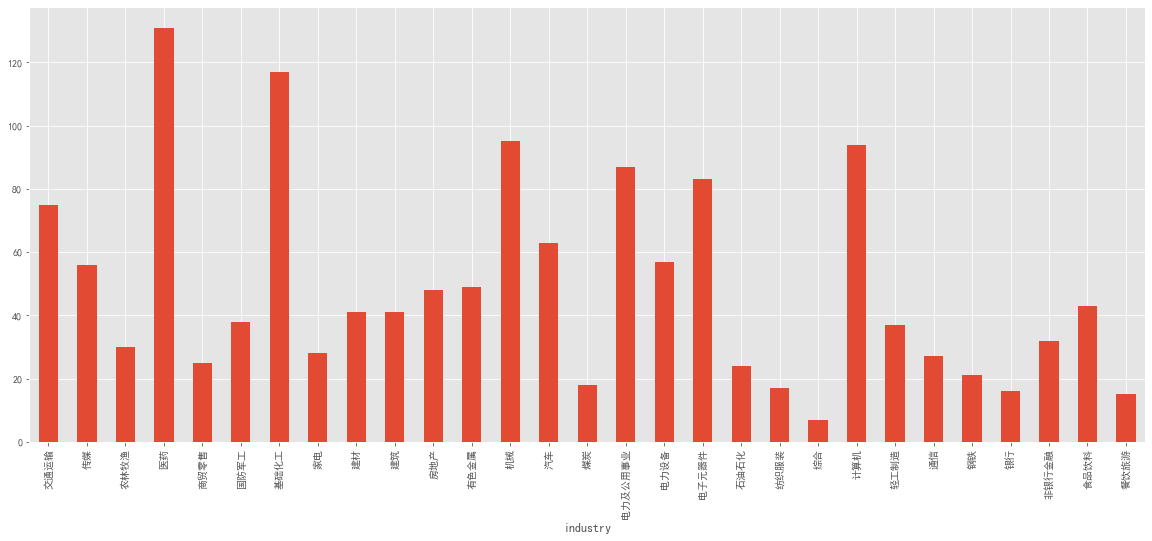

In [33]:
data.groupby(['date','industry']).size()['20170126'].sort.plot(kind='bar',figsize=(20,8))

In [48]:
data.set_index('date',inplace=True)

In [58]:
pd.set_option('max_columns',200)
data.groupby(level=0)['industry'].value_counts().unstack().describe().T

,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
交通运输,43.0,71.651163,9.697530,50.0,66.0,70.0,77.0,92.0
传媒,43.0,64.790698,9.883989,50.0,56.5,61.0,74.0,84.0
农林牧渔,43.0,29.930233,3.972497,21.0,27.0,30.0,32.5,36.0
医药,43.0,146.813953,19.381208,116.0,131.0,145.0,161.0,179.0
商贸零售,43.0,24.232558,3.584605,17.0,22.0,24.0,26.0,31.0
国防军工,43.0,44.186047,4.244076,36.0,41.0,44.0,48.0,51.0
基础化工,43.0,137.976744,23.402776,100.0,118.5,132.0,158.0,189.0
家电,43.0,28.069767,3.731432,19.0,26.0,28.0,30.0,36.0
建材,43.0,40.441860,4.500277,32.0,37.0,40.0,44.0,48.0
